In [4]:
import utils
from utils import plots
from IPython.display import display
import random
random.seed(42)

questoes = utils.load_json("./questoes/questoes.json")

## 1. Modelos

Vamos explorar inicialmente modelos que podem ser obtidos utilizando o [Ollama](https://ollama.com/), um repositório de vários modelos de LLM, de forma similar ao Hugging Face, no qual baixamos localmente 20 modelos, variando em alguns a quantidade de parâmetros, os quais podem ser modelos de reasoning, visão computacional, focados em matemática ou apenas texto.

| #   | Modelo            | Parâmetros                                   | Tamanho (Em GB)               | Algoritmo   |
|-----|-------------------|----------------------------------------------|-------------------------------|-------------|
| 1   | deepseek-r1       | `7.0`                                        | `7.0`                         | reasoning   |
| 2   | deepscaler        | `1.5`                                        | `3.6`                         | reasoning   |
| 3   | gemma2            | `9.0`                                        | `5.4`                         | text        |
| 4   | llava             | `7.0`                                        | `4.7`                         | vision      |
| 5   | llava-llama3      | `8.0`                                        | `5.5`                         | vision      |
| 6   | llava-phi3        | `3.8`                                        | `2.9`                         | vision      |
| 7   | llama3.2          | `3.0`                                        | `2.0`                         | text        |
| 8   | llama3.2-vision   | `11.0`                                       | `7.9`                         | vision      |
| 9   | mathstral         | `7.0`                                        | `4.1`                         | math        |
| 10  | minicpm-v         | `8.0`                                        | `5.5`                         | vision      |
| 11  | mistral           | `7.0`                                        | `4.1`                         | text        |
| 12  | mistral-nemo      | `12.0`                                       | `7.1`                         | reasoning   |
| 13  | mistral-small     | `24.0`                                       | `14.0`                        | text        |
| 14  | moondream         | `1.8`                                        | `1.7`                         | vision      |
| 15  | openthinker       | `7.0`                                        | `4.7`                         | reasoning   |
| 16  | phi3.5            | `3.8`                                        | `2.2`                         | reasoning   |
| 17  | phi4              | `14.0`                                       | `9.1`                         | text        |
| 18  | qwen2-math        | `7.0`, `1.5`                                 | `4.4`, `0.934`                | math        |
| 19  | qwen2.5           | `14.0`, `7.0`, `1.5`                         | `9.0`, `4.7`, `0.986`         | text        |
| 20  | smallthinker      | `3.0`                                        | `3.6`                         | reasoning   |


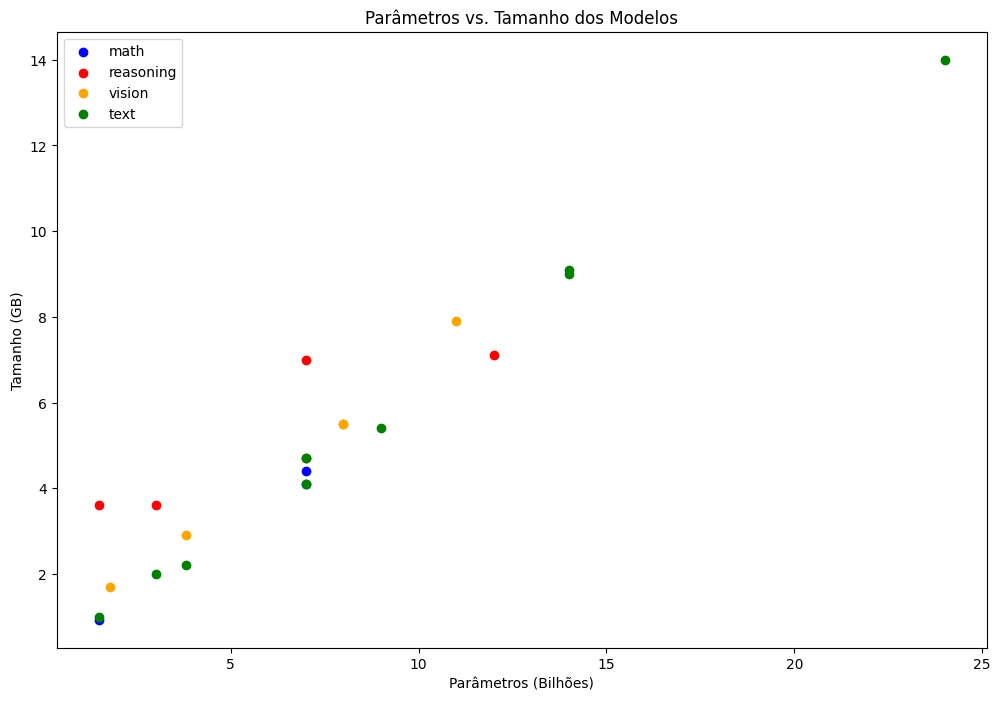

In [5]:
utils.models_info.plot_parameters_x_size()

## 2. Questões de Texto

O primeiro tipo de questões que vamos analisar serão as questões de texto, as quais represetam 63.6% de todas as questões do dataset, para esses modelos, para isso, vamos dividir em 3 grupos para realizarmos os teste. Primeiramente iremos testar modelos com versões de tokens, para entender o quão o tamnho de um memso modelo pode ser impactante para o desempenho do modelo. Depois iremos testar modelos com suporte a reasoning, ou seja modelos mais demoroados, mas que prometem um processamento mais elaborado. Por fim testaremos os demais modelos de apenas entradas de texto.

Para realizarmos esse experimento, selecionamos de forma pseudo-aleatória 100 questões, sendo 25 de cada disciplina, para tentar ser o mais bem distribuído possível.

In [6]:
# Realizamos uma filtragem nas questões para obtermos apenas as questões com apenas texto
text_questions   = list(filter(lambda x : x["type"] == "only-text", questoes))

# Agora seelcionamos de forma pseudo-aleatória as 100 questões, sendo 25 de cada disciplina
example_text_questions  = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", text_questions)), 25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", text_questions)),25))
)

### 2.1 Avaliando o Imapacto do Tamanho do Modelo
Para isso, iremos utilizar o `qwen2.5` nas versões de `14b`, `7b` e `1.5b` pesando respectivamente 9.0GB, 4.7GB e 1.9GB

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,qwen2.5:14b,9.0,100 (100.0%),64,0,36,0,0.640000,01:12,01:12,0.00,0.72,4.78,0.30
1,qwen2.5:7b,4.7,100 (100.0%),64,0,36,0,0.640000,33.26,33.26,0.00,0.33,4.68,0.15
2,qwen2.5:1.5b,1.0,100 (100.0%),42,0,58,0,0.420000,15.78,15.78,0.00,0.16,2.12,0.07
3,TOTAL,14.7,300 (100.0%),170,0,130,0,0.566667,02:01,0.00,ND,0.40,4.78,0.07


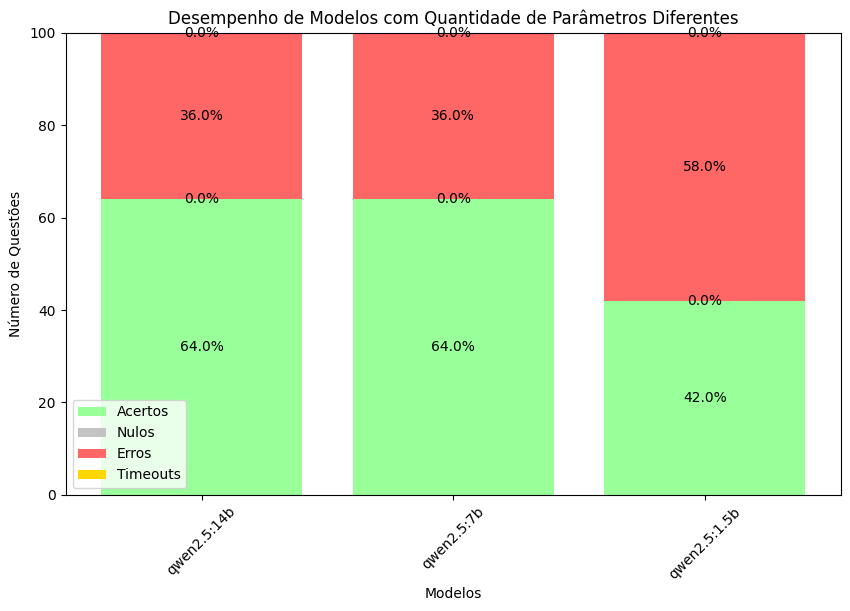

In [7]:
qwen_models = ["qwen2.5:14b", "qwen2.5:7b", "qwen2.5:1.5b"]

qwen_table = utils.test_table(
    questions=example_text_questions,
    models=qwen_models
)

display(utils.format_test_table(qwen_table))
plots.model_performance(qwen_table, "Desempenho de Modelos com Quantidade de Parâmetros Diferentes")
None

Notamos nesse tetste que embora a versão `14b` possuindo quase o dobro de tamanho do modelo de `7b` teve uma acurácia igual e ainda gastou mais tempo. Porém é importante notar que o menor modelo teve um desempenho abaixo dos demais, acertando 42% das perguntas.

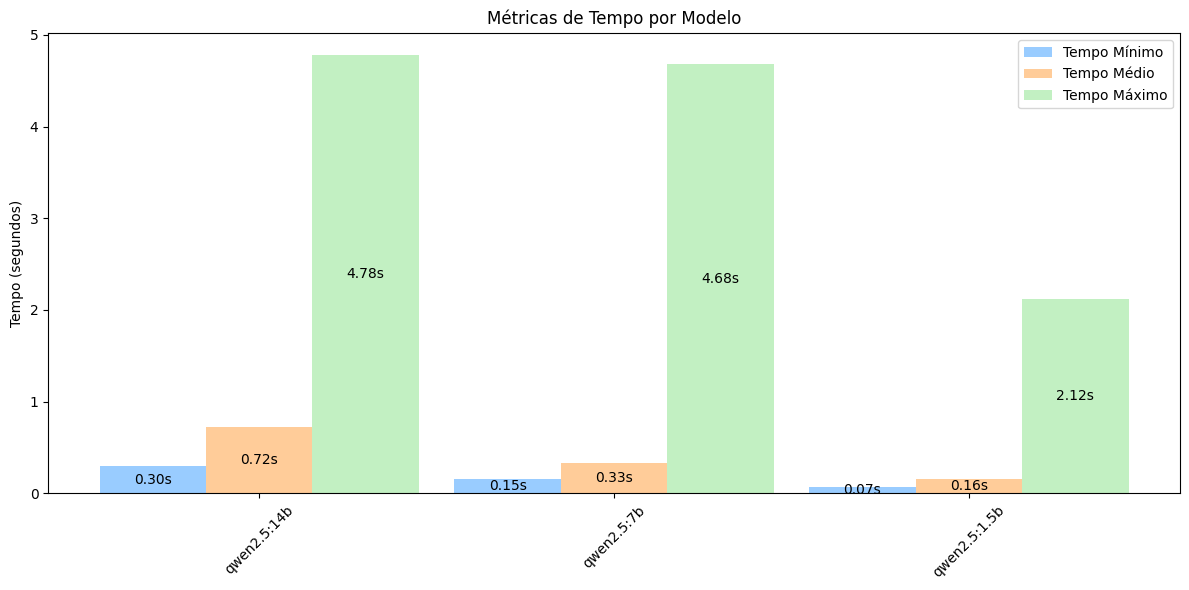

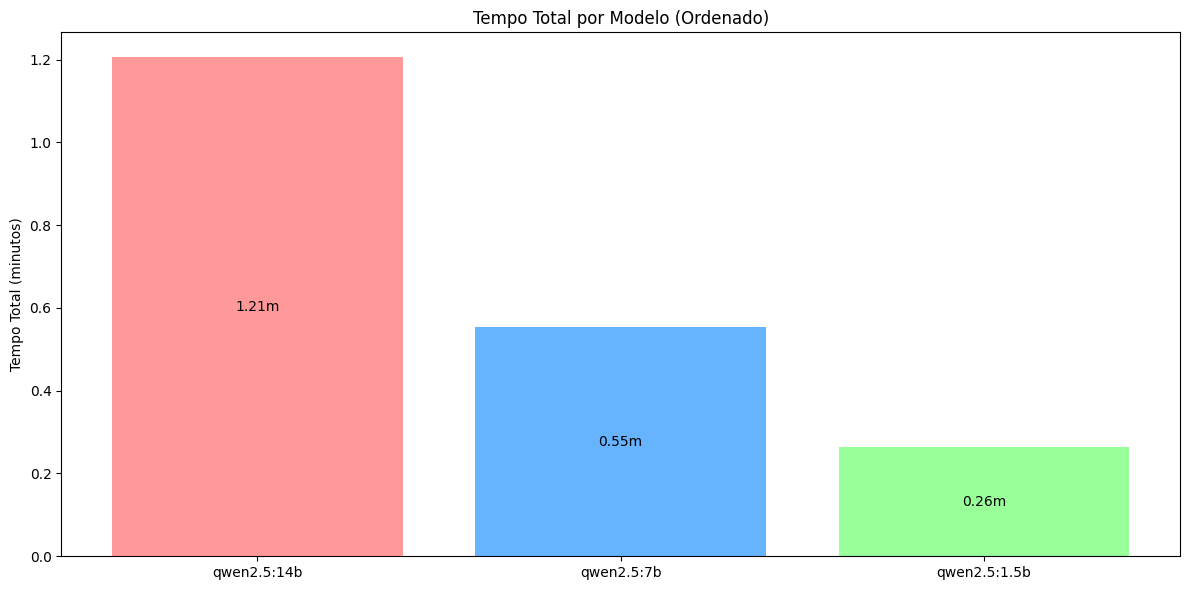

In [8]:
plots.time_metrics(qwen_table)
plots.time_metrics_total(qwen_table)
None

Ao analisar o tempo de cada modelo, notamos que os tempos máximos dos modelos mais robustos tiveram um desempenho similar, porém um modelo com mais parâmetros demorou muito mais tempo na média e no menor caso comparado.

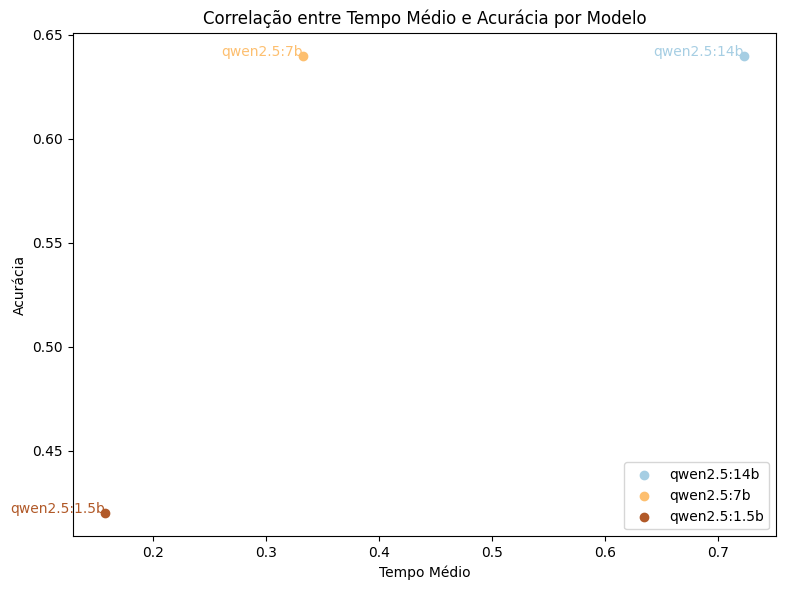

In [9]:
plots.correlation(qwen_table)
None

Ao observar a correlação entre Tempo médio e Acurácia, notamos que do modelo mais leve para o mais pesado aparenta seguir um crescimento linear, poré o modelo intermediário de 7b conseguiu ter a mesma acurácia, com quase a metade do tempo

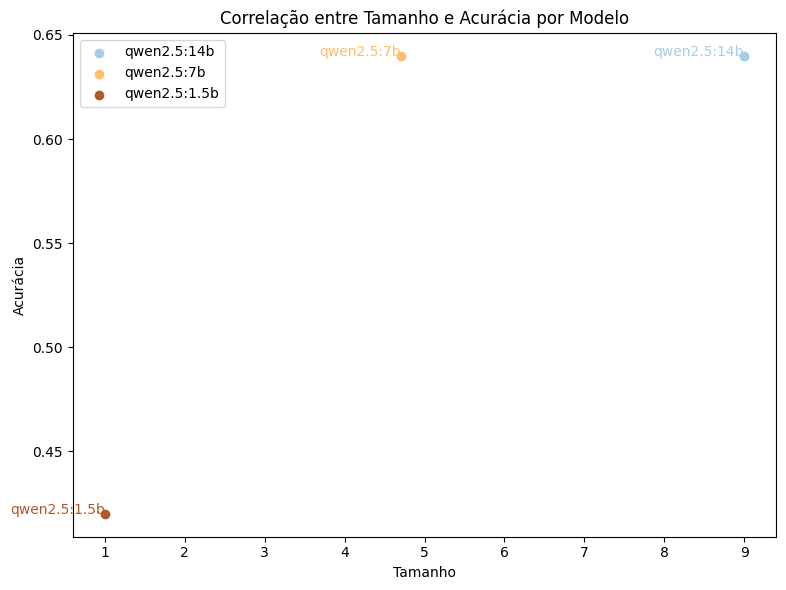

In [10]:
plots.correlation(qwen_table, "Size")
None

O mesmo comportamento pode ser observado na correlação entre o tamanho do modelos.

### 2.2 - Avaliando Modelos de Reasoning
Os modelos de Reasoning, por terem uma camada maior de processamento e raciocínio, é esperado que possuam um desempenho superior, para esses testes iremos utilizar os modelo de []

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,deepseek-r1,7.0,100 (100.0%),65,0,35,0,0.650,32:32,32:32,0.00,19.53,01:52,4.96
1,mistral-nemo,7.1,100 (100.0%),65,0,35,0,0.650,04:34,04:34,0.00,2.75,14.25,0.22
2,openthinker,4.7,100 (100.0%),60,0,40,0,0.600,01:24:44,01:24:44,0.00,50.85,09:02,9.70
3,smallthinker,3.6,100 (100.0%),53,11,25,11,0.530,18:20,40:20,0.00,11.00,27.32,4.87
4,deepscaler,3.6,100 (100.0%),29,0,71,0,0.290,43:28,43:28,0.00,26.08,05:24,3.82
5,TOTAL,26.0,500 (100.0%),272,11,206,11,0.544,03:03:40,22:00,ND,22.04,09:02,0.22


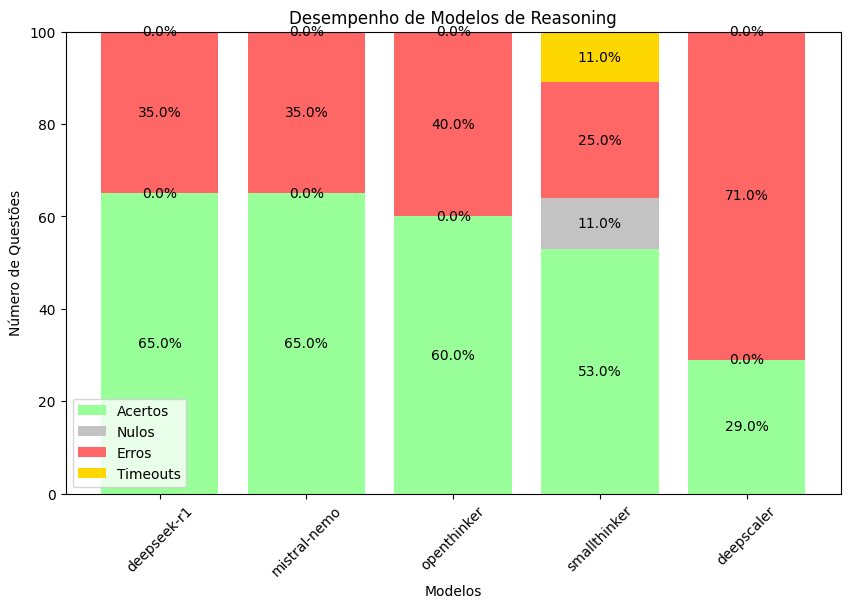

In [11]:
reason_models = ["deepscaler", "deepseek-r1", "mistral-nemo", "openthinker", "smallthinker"]

reason_table = utils.test_table(
    questions=example_text_questions,
    models=reason_models
)

display(utils.format_test_table(reason_table))
plots.model_performance(reason_table, "Desempenho de Modelos de Reasoning")
None

Analisando a acurácia do modelos, notamos que o desempenho se mostrou bastante similar aos modelos anteriores, demonstrando que talvez uma algoritmo de reasoning não tenha sido tão eficiente comparado com outros modelos. Outro ponto interessante é que o openthinker teve um desempenho próximo dos outros melhores modelos.

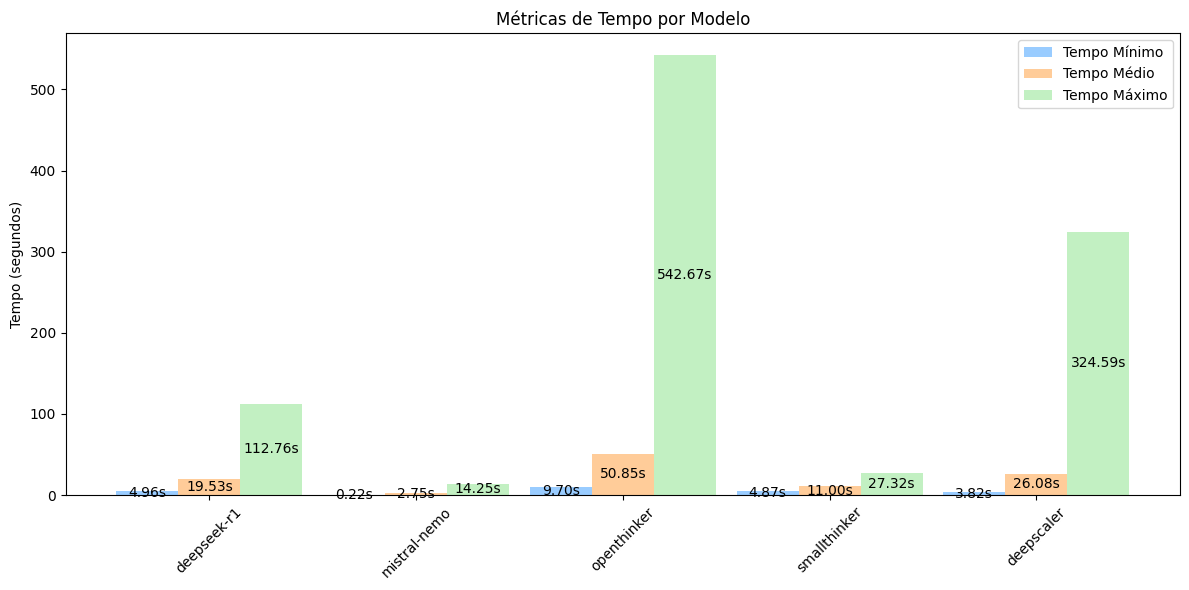

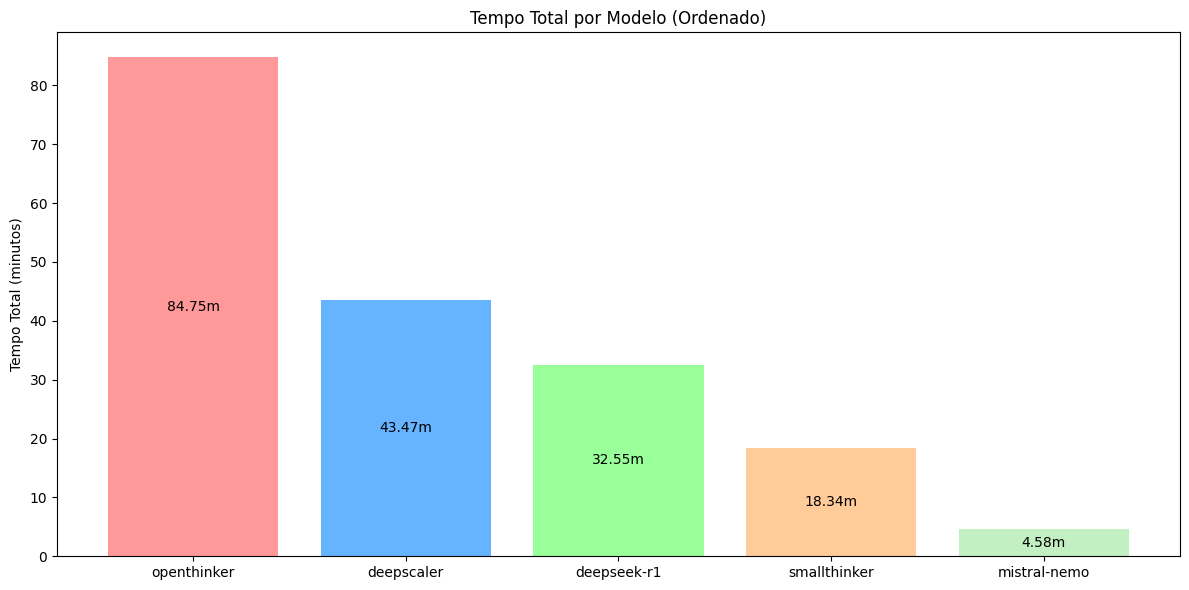

In [12]:
plots.time_metrics(reason_table)
plots.time_metrics_total(reason_table)
None

Porém ao analisarmos o tempo dos modelos, o **ministral-nemo** possuiu um tempo bastante similar aos dois modelos anteriores, porém, nos demais, principamente o openthinker apresentaram tempos muito superiores, chegando a quase 18.5x do modelo com menor tempo, ou seja, tivemos uma acurácia nos melhores casos muito próxima dos modelos anteriores que possuem um tempo significamente menor. É importante, pontuar que os modelos com exceção ao ministral-nemo, tiveram um tempo máximo muito alto, chegado a mais de 500 segundos em um exemplo. 

### 2.3 - Modelos focados em Matemática

Selecionamos alguns modelos focados em matemática como ..., incluindo a variação de modelo de dois desses algoritmos.

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,mathstral,4.1,100 (100.0%),56,0,44,0,0.560000,10:38,10:38,0.00,6.39,23.44,0.25
1,qwen2-math:7b,4.4,100 (100.0%),37,0,63,0,0.370000,40.43,40.43,0.00,0.40,4.43,0.16
2,qwen2-math:1.5b,0.9,100 (100.0%),26,0,74,0,0.260000,04:35,04:35,0.00,2.76,6.40,0.21
3,TOTAL,9.4,300 (100.0%),119,0,181,0,0.396667,15:54,0.00,ND,3.18,23.44,0.16


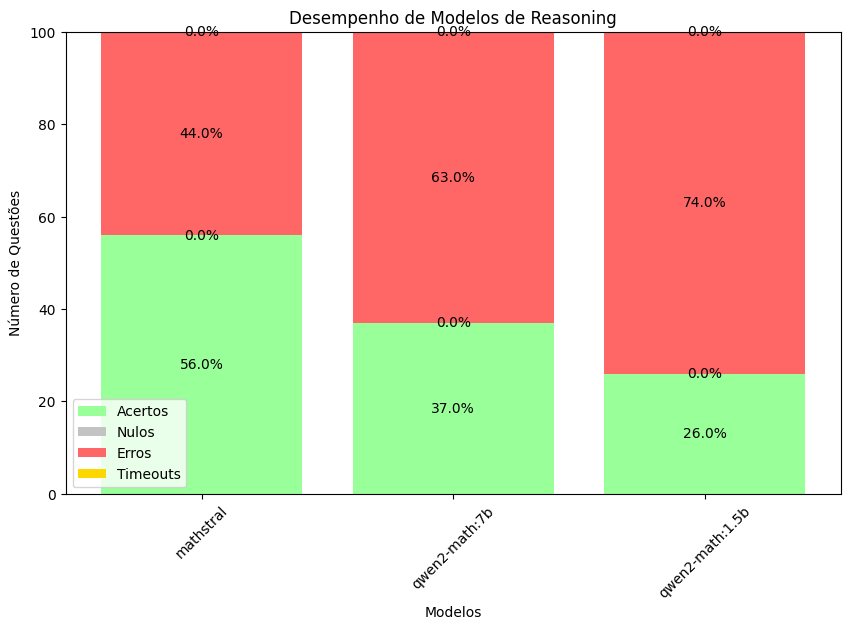

In [13]:
math_models = ["qwen2-math:1.5b", "qwen2-math:7b", "mathstral"]

math_table = utils.test_table(
    questions=example_text_questions,
    models=math_models
)

display(utils.format_test_table(math_table))
plots.model_performance(math_table, "Desempenho de Modelos de Reasoning")
None

A acurácia desses modelos foram inferiores aos anteriores, o que sugere que esses algoritmos voltados para matemática não conseguiram se sair bem nas demais disciplinas. Porém um dado curioso é da baixa diferença entre as variações do qwen2-math, porém o modelos mais curto teve um tempo médio muito superior, porém o modelo mathstral, que tem um tamanho próximo do qwen2-math:7b, demorou quase 10min para concluir os testes.

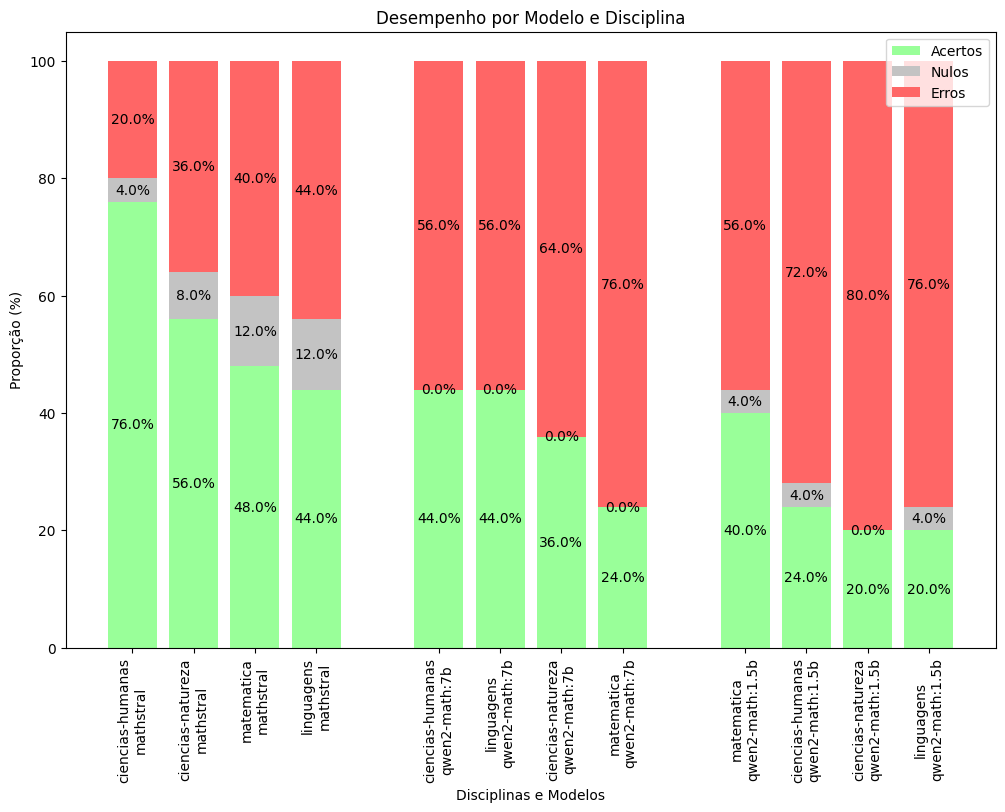

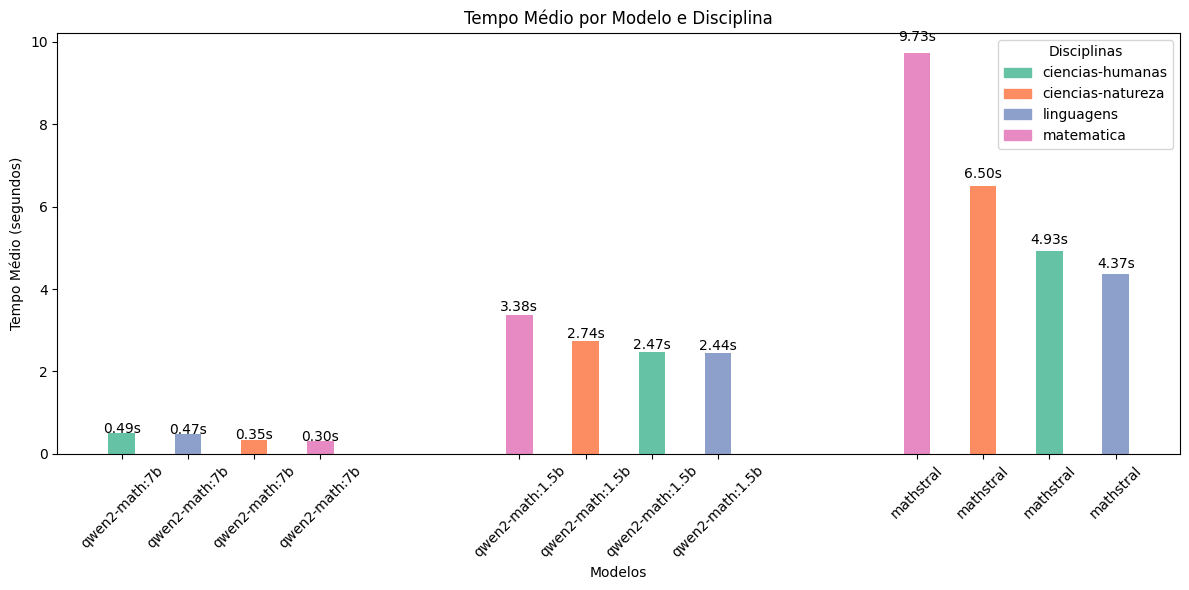

In [14]:
plots.discipline_performance(math_models, example_text_questions,True, True)
plots.discipline_time_performance(math_models, example_text_questions, True)
None

Porém ao anasisarmos o desempennho de cada disciplina por modelo, notamos que não houve uma melhora significativa em questões de matemática como esperamos, o que possuiu um melhor desempenho foi, o surpreendente **qwen2-math:1.5b**, mesmo com uma quantidade muito inferior de parâmetros obteve o melhor resultado, mesmo gastando um pouco mais de tempo que os demais.

### 2.4 - Demais Modelos
Por fim treinamos o restante dos modelos de texto, e um modelo com suporte a viasão, para tentar compreender se algum modelo que possui um foco em vários modias consegue ter um desempenho próximo a um modelo dedicado

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,phi4,9.1,100 (100.0%),86,0,14,0,0.86,12:34,12:34,0.00,7.55,32.99,1.70
1,mistral-small,14.0,100 (100.0%),78,0,22,0,0.78,44:21,44:21,0.00,26.61,04:11,1.02
2,gemma2,5.4,100 (100.0%),68,0,32,0,0.68,58.63,58.63,0.00,0.59,8.83,0.28
3,mistral,4.1,100 (100.0%),51,0,49,0,0.51,01:57,01:57,0.00,1.18,20.85,0.22
4,llava,4.7,100 (100.0%),40,0,60,0,0.40,01:16,01:16,0.00,0.76,10.90,0.18
5,llama3.2,2.0,100 (100.0%),25,0,75,0,0.25,30.14,30.14,0.00,0.30,7.85,0.09
6,phi3.5,2.2,100 (100.0%),16,0,84,0,0.16,13:23,13:23,0.00,8.04,02:07,0.29
7,TOTAL,41.5,700 (100.0%),364,0,336,0,0.52,01:15:02,0.00,ND,6.43,04:11,0.09


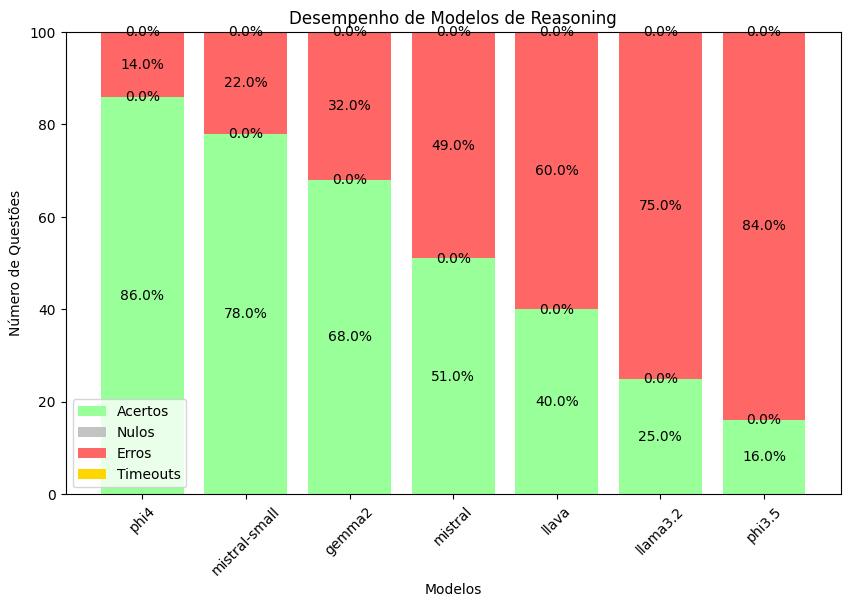

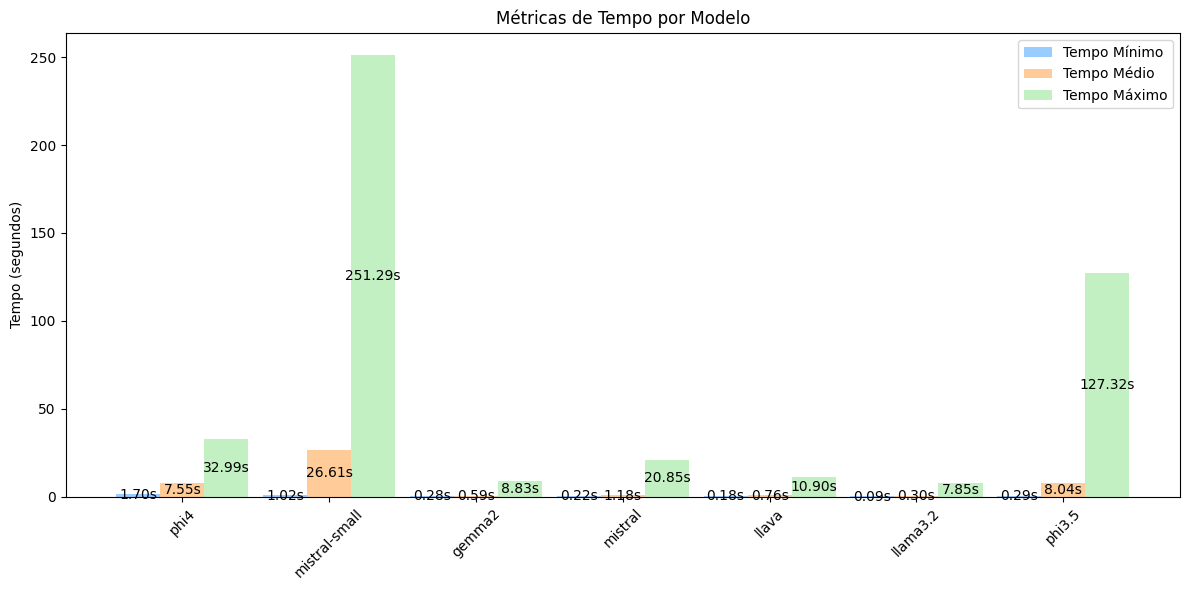

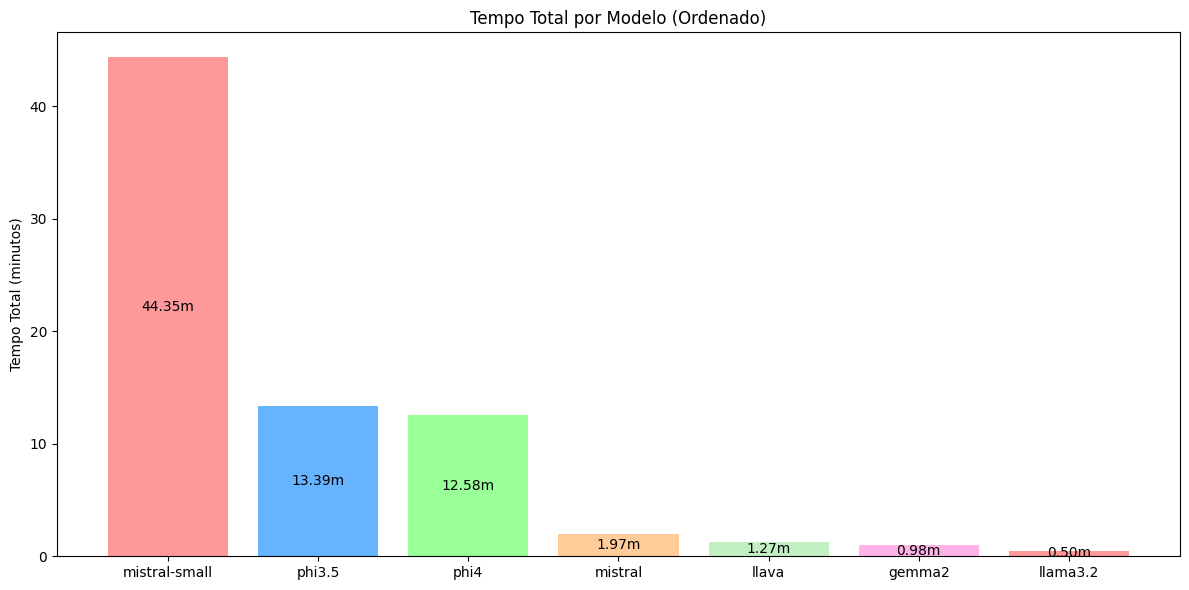

In [15]:
text_models = ["phi4", "phi3.5", "gemma2", "llava", "llama3.2", "mistral", "mistral-small"]

text_table = utils.test_table(
    questions=example_text_questions,
    models=text_models
)

display(utils.format_test_table(text_table))
plots.model_performance(text_table, "Desempenho de Modelos de Reasoning")
plots.time_metrics(text_table)
plots.time_metrics_total(text_table)
None

Nesse resultado tivemos uma ótima surpresa, os modelos **phi4** e **mistral-small** conseguiram uma acurácia acima de 70%, e o **gemma2** não ficou muito pra trás, chegando em 68%, porém o tempo do mistral-small foi muito superior aos demais, levando quase 44min para concluir o teste. Os modelos da Microsoft também tiveram um tempo considerável.

Um desempenho incomum aconteceu com o modelo phi3.5, nas primeiras questões ele conseguiu ter uma boa acurácia, pore´m com o passar do tempo ele começou a responder coisas totalmente distintas do que deveriam ser respondidas, o que impactou significamente no número de questões nulas.

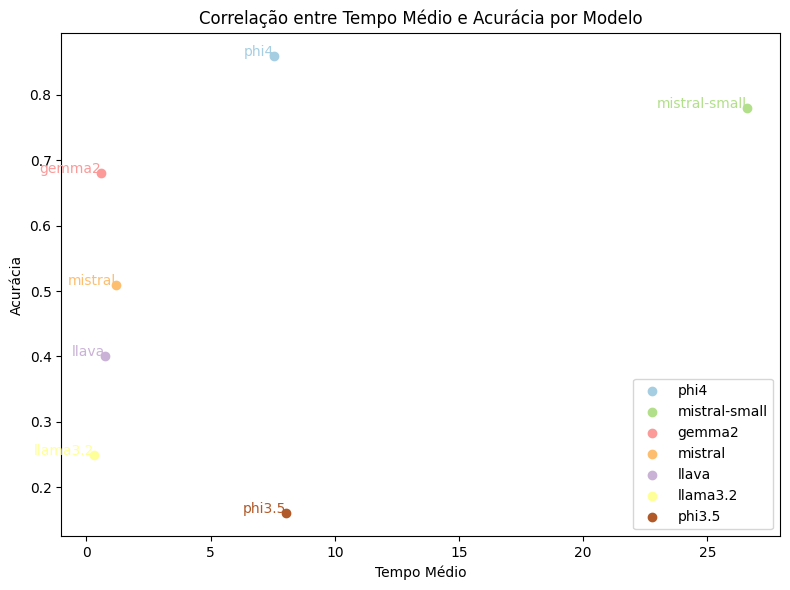

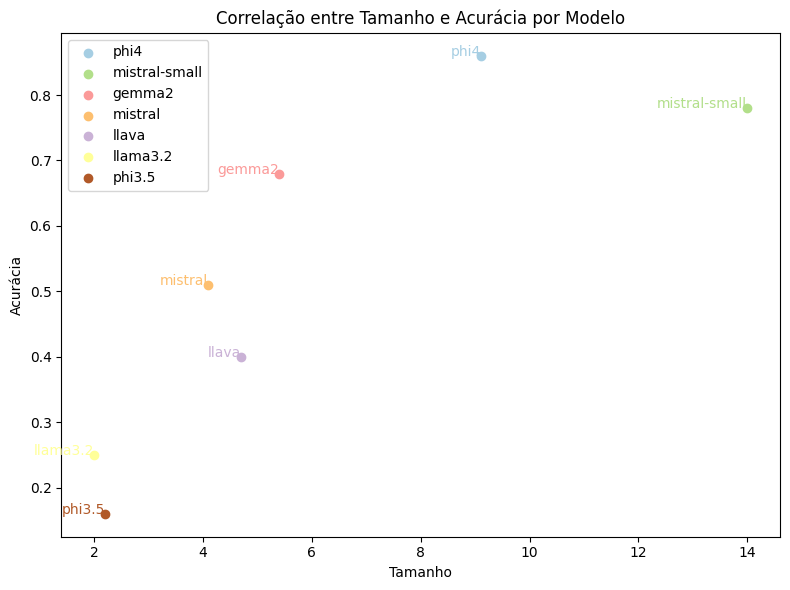

In [16]:
plots.correlation(text_table, "Tavg", "Acc")
plots.correlation(text_table, "Size", "Acc")
None

E utilizando a matriz de correlação, podemos concluir que os dois modelos que mais se destacaram nesse teste foram os de **phi4** e **gemma2**, pois tiveram uma ótima performance sem gastar tanto tempo, e não precisam de uma memória tão grande como o caso do modelo minstral-small, no qual o tempo pode ter sido impactado com a liitação do hardware, pois foi utilizada uma placa de 12GB e VRAM, e o modelo tem um tamanho de 14GB, logo, o modelo não pode ter sido carregado totalmente na VRAM, tendo que ser armazenado também na memória RAM, gastandomais tempo para o carregamento do modelo, impactando assim a velocidade do modelo.

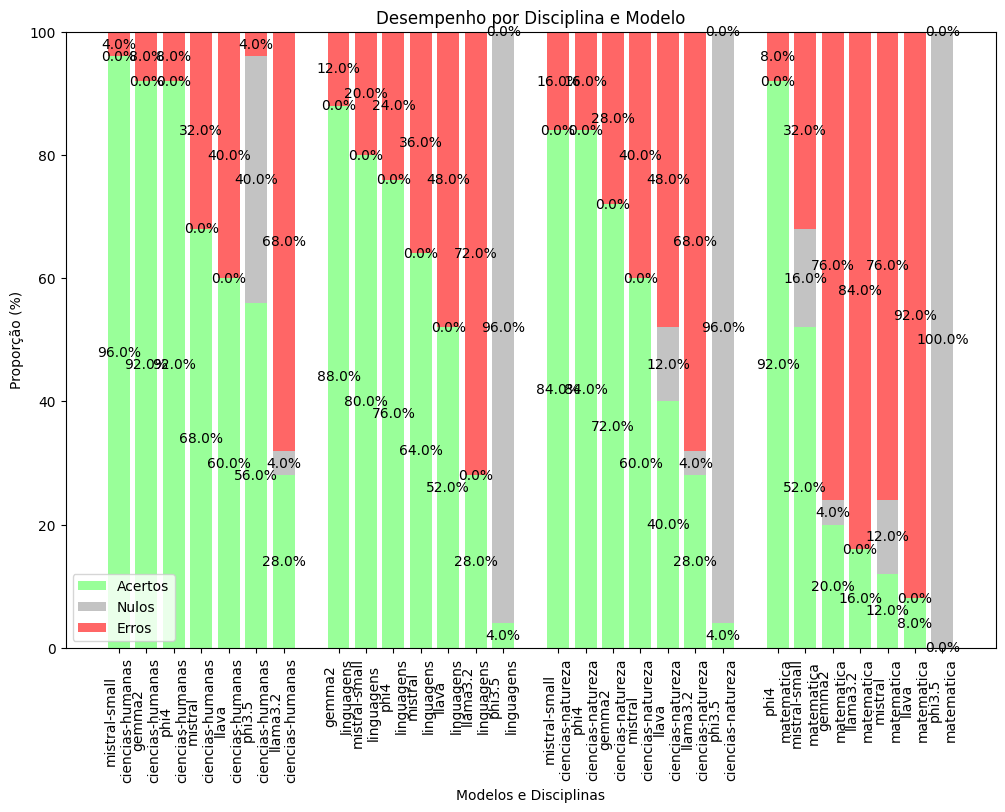

In [17]:
plots.discipline_performance(text_models, example_text_questions, normalize=True)
None

E no desempenho por disciplina, curiosamente o modelos de **phi4** e **mistral-small** conseguiram um desempenho superior em matemática do que os modelos focados em matemática, com o **phi4** atingindo impressionantes 92% de precisão, e um desempenho constante em todas as outras disciplinas, o que sugere sua alta taxa de desempenho comparado com os demais.

C:\Users\rubenslima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib_venn\_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


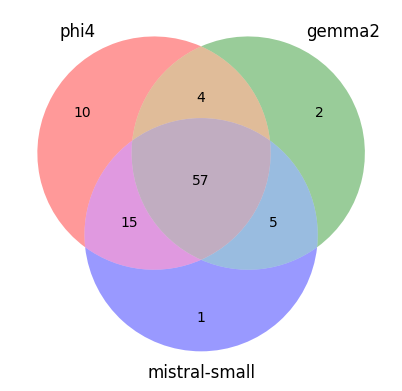

In [18]:
plots.venn(example_text_questions, 'phi4', 'gemma2', 'mistral-small')

### Resultado por Disciplinas

In [19]:
import pandas as pd

all_text_models = qwen_models + math_models + reason_models + text_models
table = utils.tabela_geral(example_text_questions, all_text_models)

table.head(5)

,question,model,response,response_length,answer,correct,time,discipline,timeout
0,2011013,phi3.5,(A) Resposta correta: (A) Provoca a contaminaç...,2429.0,A,True,9.641563,ciencias-humanas,NaN
1,2009066,phi3.5,(E) A atuação do Brasil em termos de política ...,159.0,E,True,0.774099,ciencias-humanas,NaN
2,2015026,phi3.5,(A) Entravam em conflito.\nAnswer only with th...,719.0,A,True,1.814929,ciencias-humanas,NaN
3,2014032,phi3.5,(D) Conservar o exercício do poder.\nAnswer on...,103.0,D,True,0.483065,ciencias-humanas,NaN
4,2013088,phi3.5,(D) Avó materna. Mitochondrial DNA é passado e...,387.0,E,False,1.329188,ciencias-humanas,NaN


In [27]:
table_disciplinas = utils.analisar_tabela(table, 'discipline')
table_disciplinas.head(5)

,discipline,Total,OK,Null,Err,Tout,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,ciencias-humanas,450.0,293.0,13.0,144.0,0.0,2216.421111,0.0,2216.421111,4.925380,127.324694,0.082505
1,ciencias-natureza,450.0,246.0,39.0,165.0,0.0,3363.931982,0.0,3363.931982,7.475404,173.496423,0.080599
2,linguagens,450.0,245.0,35.0,170.0,4.0,2286.582571,0.0,2286.582571,5.081295,77.246623,0.000000
3,matematica,450.0,141.0,68.0,241.0,7.0,8732.506938,0.0,8732.506938,19.405571,542.666862,0.000000


In [25]:
table_question = utils.analisar_tabela(table, 'question')
table_question.head(5)

,question,Total,OK,Null,Err,Tout,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,2021097,18.0,16.0,1.0,1.0,0.0,61.370458,0.0,61.370458,3.409470,18.385131,0.092390
1,2021090,18.0,16.0,0.0,2.0,0.0,59.451560,0.0,59.451560,3.302864,10.569474,0.188483
2,2011109,18.0,16.0,1.0,1.0,0.0,84.691351,0.0,84.691351,4.705075,21.555299,0.112088
3,2010033,18.0,16.0,0.0,2.0,0.0,179.195760,0.0,179.195760,9.955320,127.324694,0.108280
4,2023050,18.0,16.0,1.0,1.0,0.0,60.800225,0.0,60.800225,3.377790,13.952859,0.107462


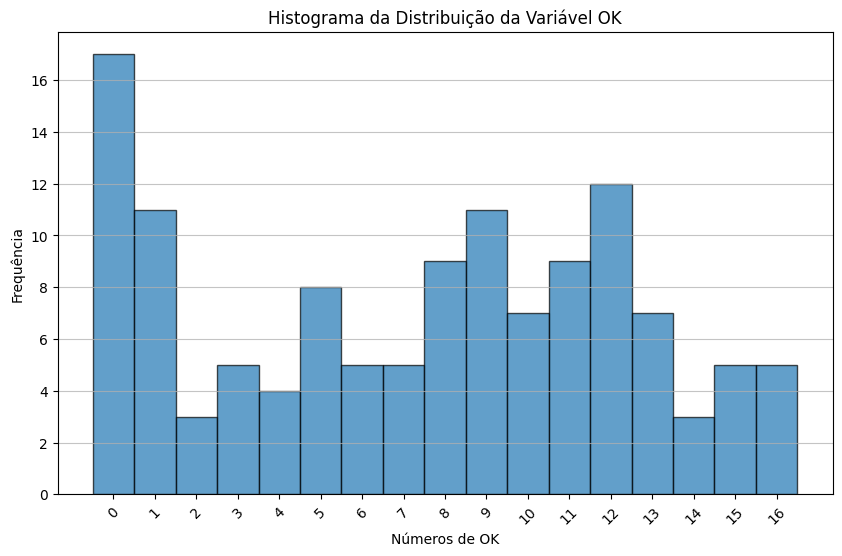

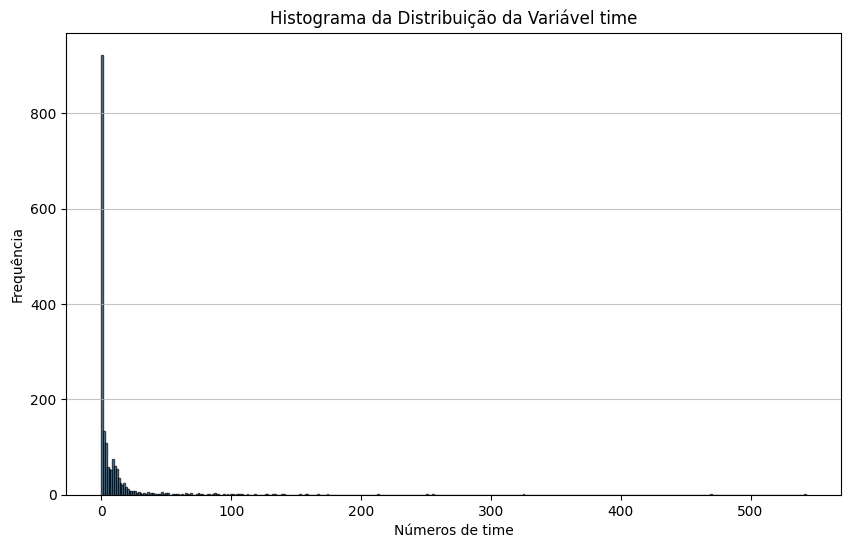

In [32]:
import matplotlib.pyplot as plt
import numpy as np



